In [82]:
import pandas as pd
import numpy as np
pd.set_option("display.max_column", None)
df = pd.read_csv("dataset/kidney_disease.csv")

In [83]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [85]:
numerical_cols = ['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo','pcv', 'wc', 'rc', 'sg']
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [86]:
def remove_numerical_error(data_frame, columns):
    for column in columns:
        cpoied_column = data_frame[column].copy()
        data_frame.drop(column, axis=1)
        data_frame.head()
        new_list = []
        for element in cpoied_column.tolist():
            if str(element).startswith("\t"):
                try:
                    if element == "":
                        element = np.nan
                    element = element[2:]
                    new_list.append(float(element))
                except ValueError:
                    print(column)
                    print(123456789)
            else:
                try:
                    new_list.append(float(element))
                except ValueError:
                    print(column, element)
        data_frame[column] = pd.DataFrame(new_list, dtype=np.float64)
    return data_frame

In [87]:
remove_numerical_error(df, numerical_cols)

pcv
123456789
wc
123456789
rc
123456789


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [88]:
def remove_tab_values(df, columns):
    for column in df[columns]:
        if df[column].dtype == 'O':
            df[column] = df[column].str.replace('\t', '')

    return df

In [89]:
df["classification"].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [90]:
df = remove_tab_values(df, categorical_cols)
df["classification"] = df["classification"].replace("ckd\t", "ckd")

In [91]:
df["classification"].unique()

array(['ckd', 'notckd'], dtype=object)

In [92]:
# df = remove_tab_values(df)

In [93]:
corr_metric = df[numerical_cols].corr()
corr_metric

,age,bp,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,sg
age,1.000000,0.159480,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.197409,0.114366,-0.188785,-0.191096
bp,0.159480,1.000000,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.218605,-0.037323,-0.302434,-0.218836
al,0.122091,0.160689,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.470092,0.133235,-0.496338,-0.469760
su,0.220866,0.222576,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.304150,0.124146,-0.289294,-0.296234
bgr,0.244992,0.160193,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.359729,0.086073,-0.335339,-0.374710
bu,0.196985,0.188517,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.286052,0.090233,-0.475525,-0.314295
sc,0.132531,0.146222,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.206530,0.029615,-0.332302,-0.361473
sod,-0.100046,-0.116422,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.281077,-0.083604,0.288896,0.412190
pot,0.058377,0.075151,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.025128,-0.087912,-0.133817,-0.072787
hemo,-0.192928,-0.306540,-0.634632,-0.224775,-0.306189,-0.610360,-0.401670,0.365183,-0.133746,1.000000,0.629605,-0.212130,0.702724,0.602582


Text(0.5, 1.0, 'Correlation Matrix')

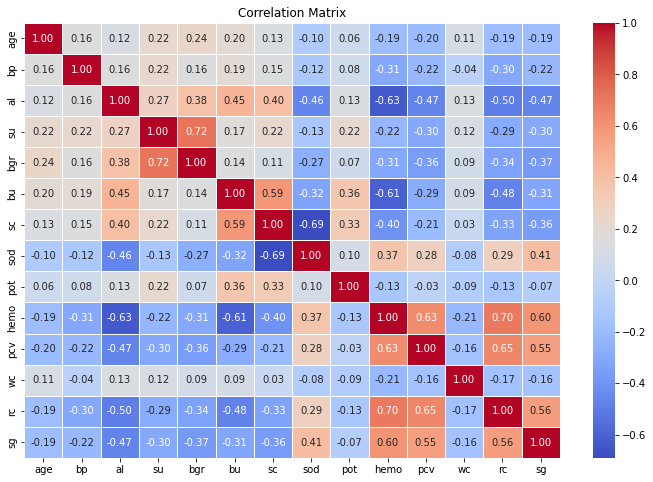

In [94]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_metric, cmap="coolwarm", fmt=".2f", linewidths=.5, annot=True)
plt.title("Correlation Matrix")

### Handling missing values

In [95]:
df.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [96]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_percentage

rbc               38.00
rc                32.75
wc                26.50
pot               22.00
sod               21.75
pcv               17.75
pc                16.25
hemo              13.00
su                12.25
sg                11.75
al                11.50
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
ba                 1.00
pcc                1.00
htn                0.50
dm                 0.50
cad                0.50
ane                0.25
appet              0.25
pe                 0.25
id                 0.00
classification     0.00
dtype: float64

***Visualizing missing values***

In [97]:
import missingno as msno

msno.matrix(df)
plt.show()

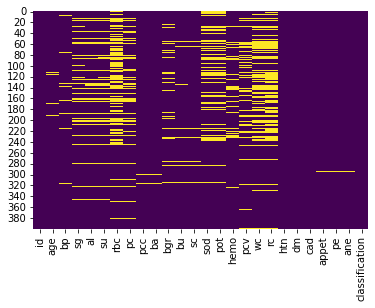

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

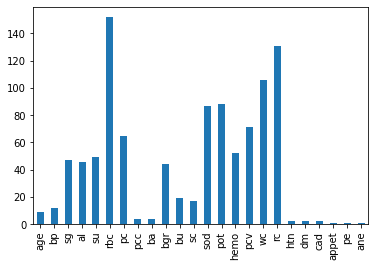

In [ ]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.plot(kind='bar')
plt.show()

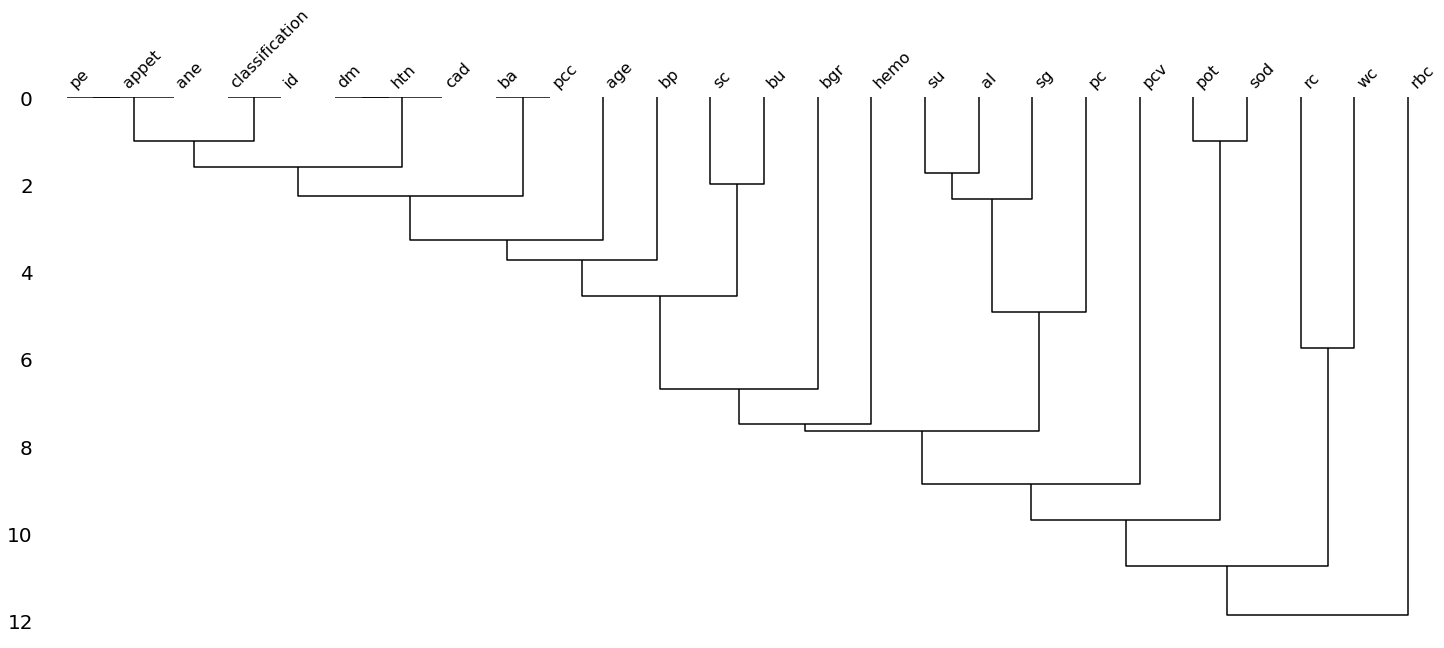

In [ ]:
msno.dendrogram(df)
plt.show()


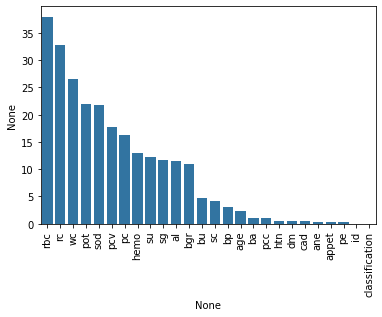

In [ ]:
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.show()

In [ ]:
x_numerical_df = df[numerical_cols]
x_categorical_df = df[categorical_cols]
y = df["classification"]

In [ ]:
x_numerical_df = x_numerical_df.fillna(x_numerical_df.mean())

In [ ]:
x_numerical_df.isna().sum()

age     0
bp      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
sg      0
dtype: int64

In [ ]:
x_categorical_df = x_categorical_df.fillna(x_categorical_df.mode())

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
x_categorical_df = imputer.fit_transform(x_categorical_df)

In [ ]:
x_categorical_df

array([['normal', 'normal', 'notpresent', ..., 'good', 'no', 'no'],
       ['normal', 'normal', 'notpresent', ..., 'good', 'no', 'no'],
       ['normal', 'normal', 'notpresent', ..., 'poor', 'no', 'yes'],
       ...,
       ['normal', 'normal', 'notpresent', ..., 'good', 'no', 'no'],
       ['normal', 'normal', 'notpresent', ..., 'good', 'no', 'no'],
       ['normal', 'normal', 'notpresent', ..., 'good', 'no', 'no']],
      dtype=object)

In [ ]:
x_categorical_df =pd.DataFrame(x_categorical_df, columns=categorical_cols)

In [ ]:
x_categorical_df.isna().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [ ]:
x_categorical_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [ ]:
x_categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rbc     400 non-null    object
 1   pc      400 non-null    object
 2   pcc     400 non-null    object
 3   ba      400 non-null    object
 4   htn     400 non-null    object
 5   dm      400 non-null    object
 6   cad     400 non-null    object
 7   appet   400 non-null    object
 8   pe      400 non-null    object
 9   ane     400 non-null    object
dtypes: object(10)
memory usage: 31.4+ KB


In [ ]:
x_numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   al      400 non-null    float64
 3   su      400 non-null    float64
 4   bgr     400 non-null    float64
 5   bu      400 non-null    float64
 6   sc      400 non-null    float64
 7   sod     400 non-null    float64
 8   pot     400 non-null    float64
 9   hemo    400 non-null    float64
 10  pcv     400 non-null    float64
 11  wc      400 non-null    float64
 12  rc      400 non-null    float64
 13  sg      400 non-null    float64
dtypes: float64(14)
memory usage: 43.9 KB


In [ ]:
x_numerical_df

,age,bp,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,sg
0,48.0,80.0,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.000000,7800.000000,5.200000,1.020
1,7.0,50.0,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.000000,6000.000000,4.707435,1.020
2,62.0,80.0,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.000000,7500.000000,4.707435,1.010
3,48.0,70.0,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.000000,6700.000000,3.900000,1.005
4,51.0,80.0,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.000000,7300.000000,4.600000,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,54.000000,7800.000000,6.200000,1.020
396,42.0,70.0,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,49.000000,6600.000000,5.400000,1.025
397,12.0,80.0,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,51.000000,7200.000000,5.900000,1.020
398,17.0,60.0,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,53.000000,6800.000000,6.100000,1.025


In [ ]:
df = pd.merge(x_categorical_df, x_numerical_df, left_index=True, right_index=True).merge(y, left_index=True, right_index=True)

In [ ]:
df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,age,bp,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,sg,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,48.0,80.0,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1.020,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,7.0,50.0,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,1.020,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,62.0,80.0,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,1.010,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,48.0,70.0,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.005,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,51.0,80.0,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,1.010,ckd


In [ ]:
df.isna().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
age               0
bp                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
sg                0
classification    0
dtype: int64

In [ ]:
df.to_csv("dataset.csv", index=False)

In [ ]:
df["classification"] = df["classification"].replace(["ckd", "notckd"], [1, 0])


In [ ]:
def dummies(df, categorical_cols=categorical_cols):
    return pd.get_dummies(df, columns=categorical_cols).astype(int)

df_dummies = dummies(df, categorical_cols)

In [ ]:
df_dummies.head()

,age,bp,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,sg,classification,rbc_abnormal,rbc_normal,pc_abnormal,pc_normal,pcc_notpresent,pcc_present,ba_notpresent,ba_present,htn_no,htn_yes,dm_ yes,dm_no,dm_yes,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,48,80,1,0,121,36,1,137,4,15,44,7800,5,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,7,50,4,0,148,18,0,137,4,11,38,6000,4,1,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,62,80,2,3,423,53,1,137,4,9,31,7500,4,1,1,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1
3,48,70,4,0,117,56,3,111,2,11,32,6700,3,1,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1
4,51,80,2,0,106,26,1,137,4,11,35,7300,4,1,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0


In [ ]:
df_dummies.reset_index(drop=True, inplace=True)


In [ ]:
df_dummies["classification"].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [ ]:
y = df_dummies["classification"]
X = df_dummies.drop(columns="classification")

In [ ]:
y = np.array(y)
X = np.array(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

***oversampling***

In [ ]:
# from imblearn.over_sampling import SMOTE


# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

### model selection

In [ ]:
some_data = X_test[1]
some_data_y = y_test[1]

In [ ]:
from sklearn.linear_model import LogisticRegression

sgd_clf = LogisticRegression(max_iter=10000)
sgd_clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
sgd_clf.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC #sensitive to feature scaling
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc


svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])


models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Suport Vector Machine": SVC(kernel="linear", C=1, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}


In [ ]:

#random forest
random_forest_parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
#kneighbors
kneighbor_parameters={'n_neighbors':[5,6,8,10,12,14,15]}
#logistic regression
logistic_parameters={'penalty':['l1','l2'],'C':[1,2,3,4,5]}
#SVC
svc_parameters=[{'C':[0.1,0.5,1,2,3],'kernel':['rbf','poly']}]
#decesion tree
deciaion_tree_parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2]}]
#linear svc
linear_svc_parameters = [{"penalty":["l1", "l2"], "loss":["hinge", "squared_hinge"], "C":[1, .1, .01, .001, .0001, .00001]}]


### Training a KNeighborsClassifier

***Cross Validation***

In [ ]:
from sklearn.base import clone
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.73333333, 0.76666667, 0.73333333])

In [ ]:
knn_clf.predict([some_data])

array([0])

In [ ]:
some_data_y

0

In [ ]:
from sklearn.base import BaseEstimator

class NeverCkdClf(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_ckd_clf = NeverCkdClf()
cross_val_score(never_ckd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.39166667, 0.39166667, 0.35      ])

***Confusion Matrix***

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[108,  28],
       [ 64, 160]])

In [ ]:
#perfect classifier confussion matrix
y_train_perfect_prediction = y_train
confusion_matrix(y_train, y_train_perfect_prediction)

array([[136,   0],
       [  0, 224]])

***Precision, Recall and F1 score***

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc
precision_score(y_train, y_train_pred)

0.851063829787234

In [ ]:
recall_score(y_train, y_train_pred)

0.7142857142857143

In [ ]:
f1_score(y_train, y_train_pred)

0.7766990291262136

Given our strong emphasis on identifying all patients with Chronic Kidney Disease (CKD) in the context of machine learning, our priority is to select a model configuration that maximizes recall.

**Precision/Recall Tradeoff**

In [ ]:
y_probas = cross_val_predict(knn_clf, X_train, y_train, cv=3, method="predict_proba")
y_scores = y_probas[:, 1]

In [ ]:
threshold = 0.2
y_train_pred_90 = (y_scores >= threshold)

In [ ]:
confusion_matrix(y_train, y_train_pred_90)

array([[ 17, 119],
       [ 12, 212]])

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    threshold_for_highlight = 0.5
    plt.axvline(threshold_for_highlight, color='red', linestyle='--', label=f'Threshold = {threshold_for_highlight}')

    # Add legend, axis labels, and grid
    plt.legend()
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision-Recall vs. Threshold")
    plt.grid(True)

    plt.show()

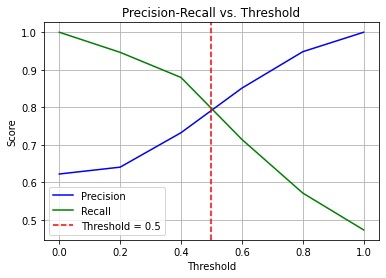

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

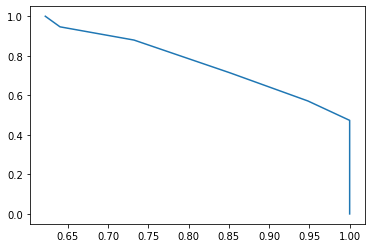

In [ ]:
plt.plot(precisions, recalls)

In [ ]:
y_train_pred_90 = (y_scores >= .3)

In [ ]:
confusion_matrix(y_train, y_train_pred_90)

array([[ 64,  72],
       [ 27, 197]])

In [ ]:
precision_score(y_train, y_train_pred_90)

0.7323420074349443

In [ ]:
recall_score(y_train, y_train_pred_90)

0.8794642857142857

***ROC Curve***

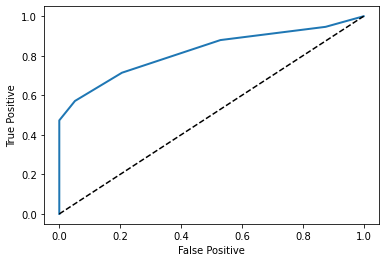

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")

plot_roc_curve(fpr, tpr)
plt.show()

Evaluating RandomForestClassifier with Threshold=0.2
Cross-validation scores: [0.98333333 0.99166667 1.        ]
Confusion Matrix:
[[135   1]
 [  2 222]]
Precision: 0.9955156950672646
Recall: 0.9910714285714286
F1 Score: 0.9932885906040269


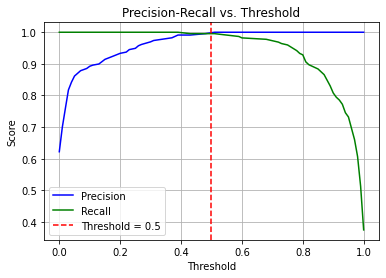

Confusion Matrix with Threshold=0.5:
[[136   0]
 [  1 223]]


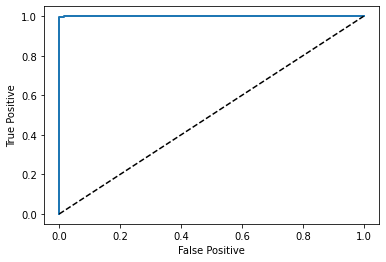

Evaluating DecisionTreeClassifier with Threshold=0.2
Cross-validation scores: [0.96666667 0.975      0.975     ]
Confusion Matrix:
[[131   5]
 [  9 215]]
Precision: 0.9772727272727273
Recall: 0.9598214285714286
F1 Score: 0.9684684684684685


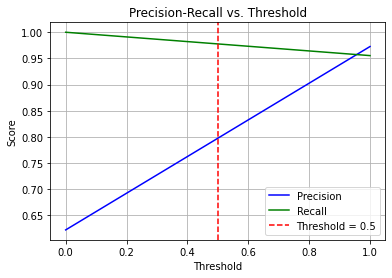

Confusion Matrix with Threshold=0.5:
[[130   6]
 [ 10 214]]


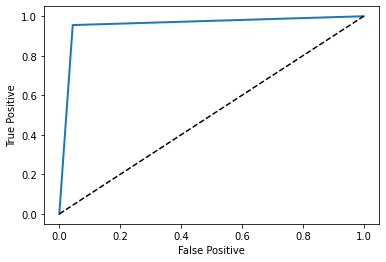

Evaluating SVC with Threshold=0.2
Cross-validation scores: [0.975      0.95833333 1.        ]
Confusion Matrix:
[[133   3]
 [  5 219]]
Precision: 0.9864864864864865
Recall: 0.9776785714285714
F1 Score: 0.9820627802690582


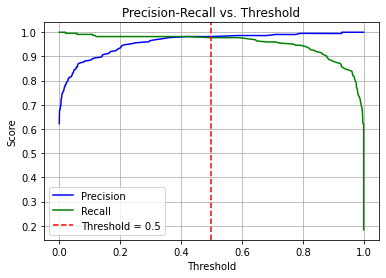

Confusion Matrix with Threshold=0.5:
[[132   4]
 [  5 219]]


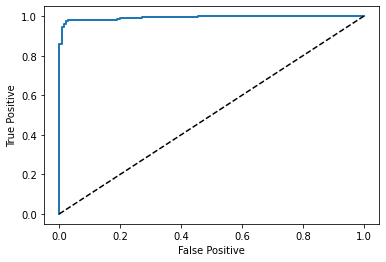

Evaluating KNeighborsClassifier with Threshold=0.2
Cross-validation scores: [0.73333333 0.76666667 0.73333333]
Confusion Matrix:
[[108  28]
 [ 64 160]]
Precision: 0.851063829787234
Recall: 0.7142857142857143
F1 Score: 0.7766990291262136


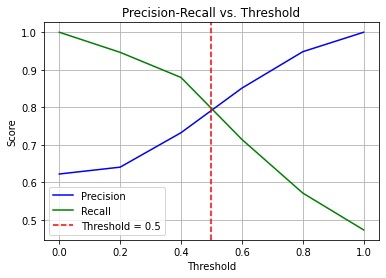

Confusion Matrix with Threshold=0.5:
[[108  28]
 [ 64 160]]


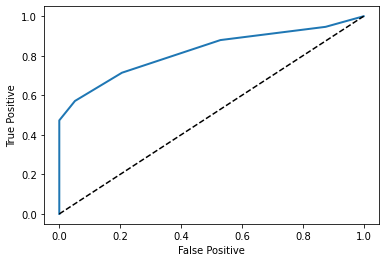

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve

def evaluate_classifier(clf, X_train, y_train, threshold=0.5):
    # Fit the classifier
    clf.fit(X_train, y_train)

    # Cross-validation scores
    cross_val_scores = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    print(f"Cross-validation scores: {cross_val_scores}")

    # Confusion Matrix
    y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")

    # Precision, Recall, F1 Score
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f"Precision: {precision}\nRecall: {recall}\nF1 Score: {f1}")

    # Precision-Recall vs. Threshold plot
    y_probas = cross_val_predict(clf, X_train, y_train, cv=3, method="predict_proba")
    y_scores = y_probas[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

    # Confusion Matrix with a user-specified threshold
    y_train_pred_threshold = (y_scores >= threshold)
    print(f"Confusion Matrix with Threshold={threshold}:\n{confusion_matrix(y_train, y_train_pred_threshold)}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    plot_roc_curve(fpr, tpr)

    plt.show()

# Example usage with different classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training data and labels
# Replace these classifiers with your desired ones
classifiers = [KNeighborsClassifier(), RandomForestClassifier(), SVC(), LogisticRegression()]

# User-specified threshold
user_threshold = 0.3

for clf_name, clf in models.items():
    print(f"Evaluating {clf.__class__.__name__} with Threshold={threshold}")
    evaluate_classifier(clf, X_train, y_train)


In [ ]:
def evaluate_classifier(clf, X_train, y_train, X_test, y_test, threshold=0.5):
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Cross-validation scores
    cross_val_scores = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

    # Confusion Matrix on test data
    y_test_pred = clf.predict(X_test)

    # F1 Score on test data
    f1_test = f1_score(y_test, y_test_pred)

    return {
        'model': clf,
        'cross_val_scores': cross_val_scores,
        'confusion_matrix_test': confusion_matrix(y_test, y_test_pred),
        'precision_test': precision_score(y_test, y_test_pred),
        'recall_test': recall_score(y_test, y_test_pred),
        'f1_test': f1_test
    }

# User-specified threshold
user_threshold = 0.3

# Evaluate each classifier and select the best one based on F1 Score
best_model = None
best_f1_score = 0.0

for clf_name, clf in models.items():
    result = evaluate_classifier(clf, X_train, y_train, X_test, y_test, threshold=user_threshold)

    print(f"\nEvaluating {clf.__class__.__name__}:")
    print(f"Cross-validation scores: {result['cross_val_scores']}")
    print(f"Confusion Matrix on Test Data:\n{result['confusion_matrix_test']}")
    print(f"Precision on Test Data: {result['precision_test']}")
    print(f"Recall on Test Data: {result['recall_test']}")
    print(f"F1 Score on Test Data: {result['f1_test']}")

    if result['f1_test'] > best_f1_score:
        best_f1_score = result['f1_test']
        best_model = result['model']

# Now 'best_model' contains the selected best model based on F1 Score
print("\nBest Model Selected:")
print(best_model)


Evaluating RandomForestClassifier:
Cross-validation scores: [0.99166667 0.99166667 1.        ]
Confusion Matrix on Test Data:
[[14  0]
 [ 0 26]]
Precision on Test Data: 1.0
Recall on Test Data: 1.0
F1 Score on Test Data: 1.0

Evaluating DecisionTreeClassifier:
Cross-validation scores: [0.975      0.96666667 0.975     ]
Confusion Matrix on Test Data:
[[14  0]
 [ 1 25]]
Precision on Test Data: 1.0
Recall on Test Data: 0.9615384615384616
F1 Score on Test Data: 0.9803921568627451

Evaluating SVC:
Cross-validation scores: [0.975      0.95833333 1.        ]
Confusion Matrix on Test Data:
[[14  0]
 [ 1 25]]
Precision on Test Data: 1.0
Recall on Test Data: 0.9615384615384616
F1 Score on Test Data: 0.9803921568627451

Evaluating KNeighborsClassifier:
Cross-validation scores: [0.73333333 0.76666667 0.73333333]
Confusion Matrix on Test Data:
[[12  2]
 [ 9 17]]
Precision on Test Data: 0.8947368421052632
Recall on Test Data: 0.6538461538461539
F1 Score on Test Data: 0.7555555555555555

Best Model 

since the models are performing well on test data, there is noneed for hyperparameter tunning

Exporting model and neccessary functions for production

In [ ]:
import joblib

def numpy_dummies():
    return np.array(dummies())
joblib.dump(best_model, "clf_model.joblib")
joblib.dump(dummies, "convert_to_dummies.joblib")

['convert_to_dummies.joblib']

In [ ]:
import joblib

def print_hello(user):
    return f"hello {user}"

joblib.dump(print_hello, "hello.joblib")

['hello.joblib']

In [29]:
#selecting random data from the test set to test the application on production
import random





df[df["classification"] == "notckd"].iloc[random.randint(0, 100)]


id                       262
age                     55.0
bp                      80.0
sg                      1.02
al                       0.0
su                       0.0
rbc                   normal
pc                    normal
pcc               notpresent
ba                notpresent
bgr                    118.0
bu                      18.0
sc                       0.9
sod                    135.0
pot                      3.6
hemo                    15.5
pcv                     45.0
wc                    8600.0
rc                       5.2
htn                       no
dm                        no
cad                       no
appet                   good
pe                        no
ane                       no
classification        notckd
Name: 262, dtype: object

In [ ]:
1234567890

1234567890